In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import copy
import math

In [54]:
test_file=pd.read_csv("Test.csv",index_col=0)
train_file=pd.read_csv("Train.csv",index_col=0)

In [56]:
train_file.dtypes
test_file.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,6.95
1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90
2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28
3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80
4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75


In [25]:
train_file["Mileage"] = train_file["Mileage"].astype(str).str.extract(r"([\d\.]+)").astype(float)
train_file["Engine"] = train_file["Engine"].astype(str).str.extract(r"([\d\.]+)").astype(float)
train_file["Power"] = train_file["Power"].astype(str).str.extract(r"([\d\.]+)").astype(float)
test_file["Mileage"] = test_file["Mileage"].astype(str).str.extract(r"([\d\.]+)").astype(float)
test_file["Engine"] = test_file["Engine"].astype(str).str.extract(r"([\d\.]+)").astype(float)
test_file["Power"] = test_file["Power"].astype(str).str.extract(r"([\d\.]+)").astype(float)

In [26]:
train_file.isnull().sum()
train_file["Mileage"].fillna(train_file["Mileage"].median(),inplace=True)
train_file["Engine"].fillna(train_file["Engine"].median(),inplace=True)
train_file["Power"].fillna(train_file["Power"].median(),inplace=True)
train_file["Seats"].fillna(train_file["Seats"].median(),inplace=True)
test_file["Mileage"].fillna(test_file["Mileage"].median(),inplace=True)
test_file["Engine"].fillna(test_file["Engine"].median(),inplace=True)
test_file["Power"].fillna(test_file["Power"].median(),inplace=True)
test_file["Seats"].fillna(test_file["Seats"].median(),inplace=True)
test_file.isnull().sum()

C:\Users\Bill\AppData\Local\Temp\ipykernel_14588\3060288680.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_file["Mileage"].fillna(train_file["Mileage"].median(),inplace=True)
C:\Users\Bill\AppData\Local\Temp\ipykernel_14588\3060288680.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

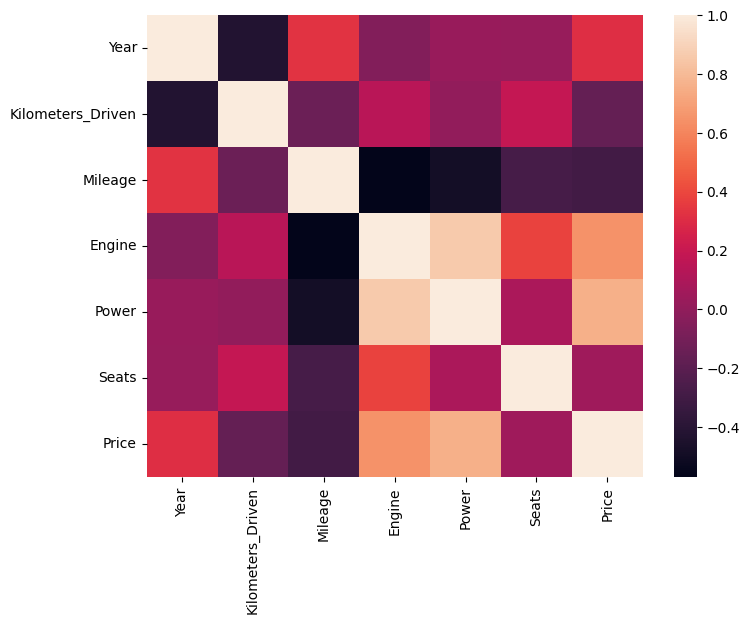

In [27]:
num_cols=train_file.select_dtypes(include=[np.number]).columns
train_file_num=train_file[num_cols]
corr_metrix=train_file_num.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_metrix)
plt.plot

In [28]:
cats = ["Fuel_Type", "Transmission", "Owner_Type", "Location"]
train_file = pd.get_dummies(train_file, columns=cats, drop_first=True)
test_file = pd.get_dummies(test_file, columns=cats, drop_first=True)

In [50]:
from sklearn.preprocessing import StandardScaler
# 1. Select numeric feature columns (excluding target)
num_cols = train_file.select_dtypes(include=[np.number]).columns.drop("Price")
# 2. Initialize scaler
scaler = StandardScaler()
# 3. Fit on train, transform both train and test using same scaler
train_file[num_cols] = scaler.fit_transform(train_file[num_cols])  # fit + transform
test_file[num_cols] = scaler.transform(test_file[num_cols])  # only transform

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,-0.096002,0.645689,1.185094,-0.622119,-0.731820,-0.343018
1,-0.402392,0.102958,-0.241362,-0.707193,-0.640337,-0.343018
2,1.129557,-0.512383,0.123545,-0.707193,-0.585074,-0.343018
3,-0.708782,1.210929,-1.004350,1.299546,1.900648,-0.343018
4,-0.096002,0.046387,0.512780,-0.707193,-0.640337,-0.343018
...,...,...,...,...,...,...
1245,-0.096002,0.319079,1.030285,-0.064970,0.242753,-0.343018
1246,-2.547121,0.814882,-0.274535,-0.466985,-0.563790,-0.343018
1247,1.129557,-0.188277,-0.183861,-0.707193,-0.181056,-0.343018
1248,-0.402392,0.616561,0.229700,-0.064970,0.244994,-0.343018


In [51]:
X_train=train_file[num_cols].values.astype('float64')
y_train=train_file["Price"].values.astype('float64')
X_test=test_file[num_cols].values.astype('float64')
y_test=test_file["Price"].values.astype('float64')


In [36]:
def function(w, b, x):
    return np.dot(x, w) + b

In [37]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

In [38]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0.
    predict=0.0
    for i in range(m):
        predict=(np.dot(X[i],w)+b)
        err=predict-y[i]
        for j in range(n):
            dj_dw[j]+=err*X[i,j]
        dj_db+=err
    dj_db/=m
    dj_dw/=m
    return dj_db,dj_dw


In [39]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    J_history = []
    train_acc= np.zeros(num_iters)
    test_acc= np.zeros(num_iters)
    w = copy.deepcopy(w_in) 
    b = b_in
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)   
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db     
        cost = cost_function(X, y, w, b)
        J_history.append(cost)      
        if i%100==0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w, b, J_history,train_acc,test_acc

In [16]:
initial_w=np.zeros(X_train.shape[1])
initial_b=0
iterations=10000
alpha=0.1
st_time=time.time()
weights, bias, cost_history, train_acc, test_acc = gradient_descent(X_train, y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)
en_time=time.time()
print("\nFinal cost:", cost_history[-1])
print("Final weights:", weights)
print("Final bias:", bias)

Iteration    0: Cost    85.68
Iteration  100: Cost    20.92
Iteration  200: Cost    20.88
Iteration  300: Cost    20.87
Iteration  400: Cost    20.87
Iteration  500: Cost    20.87
Iteration  600: Cost    20.87
Iteration  700: Cost    20.87
Iteration  800: Cost    20.87
Iteration  900: Cost    20.87
Iteration 1000: Cost    20.87
Iteration 1100: Cost    20.87
Iteration 1200: Cost    20.87
Iteration 1300: Cost    20.87
Iteration 1400: Cost    20.87
Iteration 1500: Cost    20.87
Iteration 1600: Cost    20.87
Iteration 1700: Cost    20.87
Iteration 1800: Cost    20.87
Iteration 1900: Cost    20.87
Iteration 2000: Cost    20.87
Iteration 2100: Cost    20.87
Iteration 2200: Cost    20.87
Iteration 2300: Cost    20.87
Iteration 2400: Cost    20.87
Iteration 2500: Cost    20.87
Iteration 2600: Cost    20.87
Iteration 2700: Cost    20.87
Iteration 2800: Cost    20.87
Iteration 2900: Cost    20.87
Iteration 3000: Cost    20.87
Iteration 3100: Cost    20.87
Iteration 3200: Cost    20.87
Iteration 

In [35]:
from sklearn.metrics import r2_score

y_train_pred = np.dot(X_train, weights) + bias
y_test_pred = np.dot(X_test, weights) + bias

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test  R²:", r2_score(y_test, y_test_pred))

Train R²: 0.6675881194288948
Test  R²: 0.5805394780517552


In [60]:
y_min = min(min(y_train),min(function(weights,bias,X_train)))
y_max= max(max(y_train),max(function(weights,bias,X_train)))
y = np.linspace(y_min,y_max)
x = y  # x is equal to y

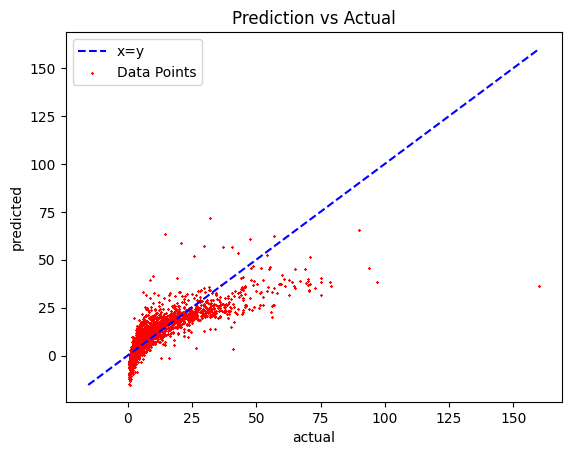

In [61]:
plt.plot(x, y, color="blue",linestyle = "--", label="x=y")
plt.scatter(y_train,function(weights,bias,X_train), color='red', marker='x', s=1, label='Data Points')
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("Prediction vs Actual")
plt.legend()
plt.show()